### Exercise 1 - Monte Carlo estimates of Pi

For each of the 500 samples, we draw 10 000 realizations, $x_i 's$, from a uniform and use the average value method,
$$f_{avg} = \frac{1}{b-a} \int_a^b f(x) dx\, .$$

to calculate $\pi$. In particular, we want to calculate the area under the quarter of a unit-circle thus $f(x) = \sqrt{1-x^2}$ and we compute:

$$\int_0^1 \sqrt{1-x^2} dx= \frac{\pi}{4}\, .$$



In [2]:
import numpy as np
import datetime

On one sample

In [4]:
N = 10000
x = np.random.uniform(0,1, N)
f_x = np.sqrt(1-x**2)
integral = np.mean(f_x)

integral*4

3.1415111813888985

over 500 datasets

In [108]:
samples = 5000 # 5e5
N = 10000

pi_estimates = np.zeros(samples)
# set seed
rng = np.random.RandomState(seed  = 19)
 
time_start = datetime.datetime.now()
for ss in range(samples):
    x = rng.uniform(0,1, N)
    f_x = np.sqrt(1-x**2)
    integral = np.mean(f_x)
    pi_estimates[ss] = integral*4
    
time_end = datetime.datetime.now()
time_delta = time_end - time_start

In [109]:
print(time_delta.seconds)
print(time_delta.microseconds/1e6)


0
0.645304


In [110]:
print(np.mean(pi_estimates))

print(np.sqrt(np.var(pi_estimates)))

3.1418960539393677
0.008879452663194893


In [111]:
import matplotlib.pyplot as plt

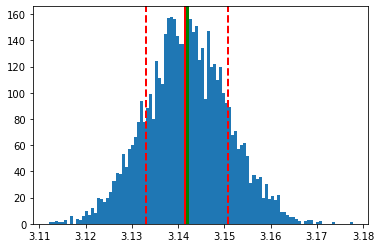

In [112]:
plt.hist(pi_estimates, bins = 100);

plt.axvline(np.pi, color = "red", lw = 4)
plt.axvline(np.mean(pi_estimates), color = "green", lw =3)

plt.axvline(np.mean(pi_estimates)+ np.sqrt(np.var(pi_estimates)), linestyle = "dashed", color = "red", lw = 2)
plt.axvline(np.mean(pi_estimates)-np.sqrt(np.var(pi_estimates)), linestyle = "dashed", color = "red", lw = 2)


### How to Parallelise?
This example is trivially parallelisable as we can delegate each sample estimate to a processor and recollect them to compute the mean and variance of all sample estimates.

```
from parallel.backends import BackendMPI as Backend
backend = Backend()

S = 50000
# one sample estimate
def sample_est_pi(sample_iteration_id, N, rng = np.random.RandomState()):
    x = np.random.uniform(0,1, N)
    f_x = np.sqrt(1-x**2)
    integral = np.mean(f_x)
    return integral*4

# function to parallelise
def multi_sample_pi(ind):
    return sample_est_pi(sample_iteration_id=ind, N = 10000)

seed_arr = [ind for ind in range(S)]
seed_pds = backend.parallelize(seed_arr)
accepted_parameters_pds = backend.map(multi_sample_pi, seed_pds)
accepted_parameters = backend.collect(accepted_parameters_pds)
```


## Retriving estimates 

In [3]:
parallel_estimates = np.genfromtxt('estimates_pi.csv', delimiter=',')

In [4]:
len(parallel_estimates)

500000

In [5]:
import matplotlib.pyplot as plt

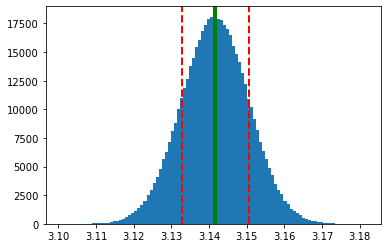

In [6]:
plt.hist(parallel_estimates, bins = 100);

plt.axvline(np.pi, color = "red", lw = 4)
plt.axvline(np.mean(parallel_estimates), color = "green", lw =3)

plt.axvline(np.mean(parallel_estimates)+ np.sqrt(np.var(parallel_estimates)), linestyle = "dashed", color = "red", lw = 2)
plt.axvline(np.mean(parallel_estimates)-np.sqrt(np.var(parallel_estimates)), linestyle = "dashed", color = "red", lw = 2)


In [7]:
print(np.mean(parallel_estimates))

print(np.sqrt(np.var(parallel_estimates)))

3.141588107057106
0.008922692835609453
